In [1]:
from analysis import *
import recommend_track
from pre_processing import read_pre_processed_data
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
from recommend_track import *
from IPython.display import Image
playlist_df, tracks_df, playlist_tracks_df = read_pre_processed_data('../data')
tracks_df['id'] = tracks_df['track_uri'].apply(lambda x: x.split(':')[-1])
cluster_tracks_df = pd.read_csv('../data/tracks_cluster.csv',header=0)

# Top 10 Playlists based on number of Followers

/Users/apekshagaonkar/Documents/GitHub/ece143final/src/plots.py:46: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


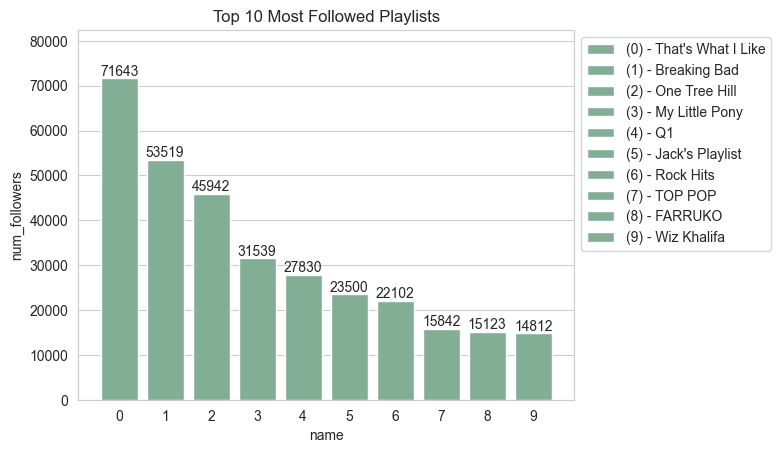

In [2]:
top_10_playlists = most_followed_playlist(playlist_df,N=10)
Image(filename=f"top10_playlist.png")


# Get the track info for the tracks in the top playlist

In [3]:
playlist_id = top_10_playlists.iloc[0]["pid"]
track_audio_features = playlist_track_features(tracks_df, playlist_tracks_df, playlist_id)
track_audio_features.head()

,id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,5lXcSvHRVjQJ3LB2rLKQog,Superstition - Single Version,0.650,0.658,100.541,-10.908,0.883,0.0850,0.004030,0.0526,0.0887
1,0sKlV58cODrjxGFOyf9IXY,The Way You Make Me Feel - 2012 Remaster,0.877,0.854,114.472,-4.523,0.540,0.1470,0.000055,0.1440,0.0544
2,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,0.853,0.560,134.066,-4.961,0.860,0.0406,0.000000,0.0944,0.0130
3,6b8Be6ljOzmkOmFslEb23P,24K Magic,0.818,0.803,106.970,-4.282,0.632,0.0797,0.000000,0.1530,0.0340
4,5GorFaKkP2mLREQvhSblIg,All My Life,0.629,0.511,128.038,-8.651,0.181,0.0326,0.000004,0.0588,0.1140


# Get cosine similarity between current track and tracks in givent playlist

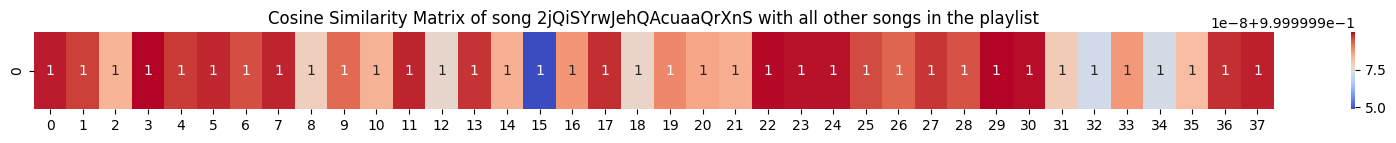

In [4]:
cos_sim = reccomended_track_similarity(cluster_tracks_df,track_audio_features,"2jQiSYrwJehQAcuaaQrXnS",plot=True)

# Which is the next similar track to play from the given playlist?

In [5]:
recommended_tracks = next_song_from_playlist(tracks_df,cluster_tracks_df,track_audio_features,"2jQiSYrwJehQAcuaaQrXnS")
recommended_tracks

,id,track_name
1641,6b8Be6ljOzmkOmFslEb23P,Superstition - Single Version
1899,0nyrltZrQGAJMBZc1bYvuQ,24K Magic
2293,1AwJGxWNl5n8O2CSlvPKYL,Get Down On It - Single Version
3249,7J41dYQolQJEtj3UmKLu5r,The Only One For Me
15988,3l3xTXsUXeWlkPqzMs7mPD,Dancing On The Ceiling
15993,6m59VvDUi0UQsB2eZ9wVbH,End Of The Road
15994,5lXcSvHRVjQJ3LB2rLKQog,Poison
27490,3G6hxSp260RzGw4sOiDOQ3,Get Up Offa That Thing
29808,1OsCKwNZxph96EkNusILRy,U Got It Bad
61877,29z6nESQsLBgtJkUXOJvGN,Case Of The Ex (Whatcha Gonna Do)


# Clustering of tracks based on track features 

In [8]:
# tracks_feature_df = pd.read_csv('../data/tracks_features.csv',header=0)
# cluster_tracks_df = clustering_tracks(tracks_feature_df)
cluster_tracks_df = pd.read_csv('../data/tracks_cluster.csv',header=0)
cluster_tracks_df.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.615,0.1140,-17.285,0.0357,0.926,0.000004,0.1660,0.401,101.189,6QHYEZlm9wyfXfEM1vSu1P,277107,4
1,0.390,0.3100,-14.545,0.0676,0.794,0.000000,0.3790,0.584,177.515,3RkQ3UwOyPqpIiIvGVewuU,330533,4
2,0.505,0.2580,-12.193,0.0297,0.805,0.000000,0.1200,0.641,141.003,0ju1jP0cSPJ8tmojYBEI89,254305,4
3,0.567,0.1980,-18.681,0.0327,0.919,0.000871,0.1350,0.321,92.467,7ny2ATvjtKszCpLpfsGnVQ,412200,4
4,0.380,0.0993,-20.567,0.0509,0.914,0.000023,0.0605,0.440,174.874,18GiV1BaXzPVYpp9rmOg0E,165427,4
5,0.579,0.4790,-10.348,0.0294,0.206,0.002110,0.1630,0.937,135.459,0wfBooQ6QtDm63UIyIcDIj,177200,6
6,0.383,0.2240,-16.990,0.0274,0.768,0.000000,0.0870,0.466,102.940,3xNO6JUk9ySYjxuqzcZYRB,288000,4
7,0.666,0.6170,-10.851,0.0628,0.565,0.000000,0.0498,0.764,105.648,5ka7NFOlZUpVLJmA2tO0o4,389800,6
8,0.702,0.5600,-12.323,0.0342,0.571,0.000000,0.1090,0.889,125.452,2FDTgrYDUdQKyGmtynEk90,171107,6
9,0.717,0.8040,-7.563,0.0342,0.664,0.000010,0.3490,0.488,121.017,2GbmNHjKB1HxSnyobburxg,165933,6


# Reccommend next song given current song

In [9]:
# Reccommend next song to the playlist from tracks_df
recommended_tracks = get_recommendation_from_cluster(cluster_tracks_df,tracks_df,"2jQiSYrwJehQAcuaaQrXnS")
print(recommended_tracks)

                           id                  track_name
7171   6SwRhMLwNqEi6alNPVG00n     LOYALTY. FEAT. RIHANNA.
8691   0zu383xVfq68H6XkHZ8prP               Broken Pieces
9811   64Kn7kkCZDPQGt9TiXH3go     Bringing Down the Giant
10641  2Q659ZNGaigzIlL8D7oM2J                Phase Me Out
13343  46fcIFmBmXbVmjSUbTODk0  Ready for Us (feat. Sykes)
20285  2N3Q67zEpXwJ8a09wg2A4f            Night Won't Fall
20472  0DSIv9DJruGLaRRLKKgit3            NY Is Killing Me
23930  2e4FBygHA19B233VpRmEMC          The More I See You
29499  7M2cKcvCnflzp9WcxGjlbm                 Barbed Wire
49092  3nOIAbewLk1lDm6DRykltl                   The Throw


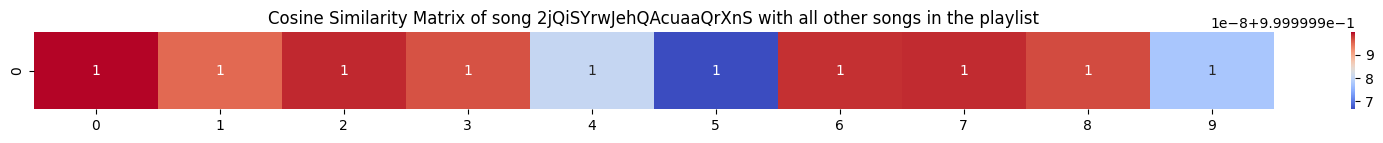

In [13]:
reccomended_track_similarity(recommended_tracks,cluster_tracks_df,"2jQiSYrwJehQAcuaaQrXnS")